<a href="https://colab.research.google.com/github/MRazin172/Reinforcement-Learning/blob/main/2348534_RL_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np

class MDP:
    def __init__(self, states, actions, transition_prob, rewards, gamma):
        self.states = states
        self.actions = actions
        self.transition_prob = transition_prob
        self.rewards = rewards
        self.gamma = gamma

    def value_iteration(self, threshold=1e-5):
        values = np.zeros(len(self.states))

        while True:
            delta = 0
            new_values = np.copy(values)

            for s in range(len(self.states)):
                action_values = []

                for a in range(len(self.actions)):
                    action_value = 0
                    for s_next in range(len(self.states)):
                        prob = self.transition_prob[s][a][s_next]
                        reward = self.rewards[s][a][s_next]
                        action_value += prob * (reward + self.gamma * values[s_next])

                    action_values.append(action_value)

                new_values[s] = max(action_values)
                delta = max(delta, abs(new_values[s] - values[s]))

            values = new_values
            if delta < threshold:
                break

        policy = np.zeros(len(self.states), dtype=int)

        for s in range(len(self.states)):
            action_values = []
            for a in range(len(self.actions)):
                action_value = 0
                for s_next in range(len(self.states)):
                    prob = self.transition_prob[s][a][s_next]
                    reward = self.rewards[s][a][s_next]
                    action_value += prob * (reward + self.gamma * values[s_next])

                action_values.append(action_value)

            policy[s] = np.argmax(action_values)

        return policy, values

Optimal Policy: [1 1 1 0]
Optimal Value Function: [3.63982327 3.2027697  2.75991256 2.15991256]


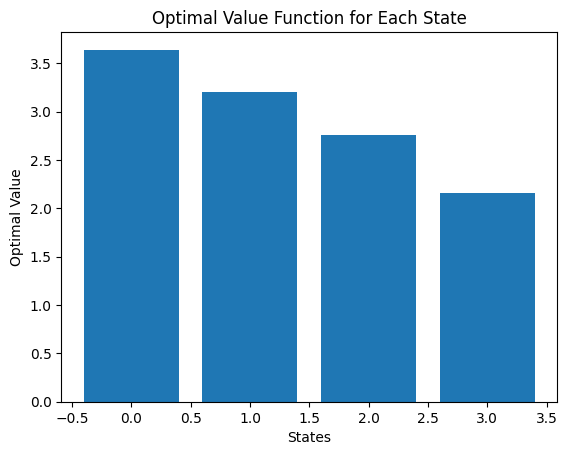

In [6]:
states = [0, 1, 2, 3]
actions = [0, 1]
transition_prob = [
    [[0.7, 0.3, 0, 0], [0.4, 0.6, 0, 0]],
    [[0.4, 0.6, 0, 0], [0, 0.8, 0.2, 0]],
    [[0, 0, 0.7, 0.3], [0, 0, 0.4, 0.6]],
    [[0, 0, 0.4, 0.6], [0, 0, 0, 1]]
]
rewards = [
    [[0, 0, 0, 0], [0, 1, 0, 0]],
    [[0, 0, 0, 0], [0, 0, 2, 0]],
    [[0, 0, 0, 0], [0, 0, 0, 1]],
    [[0, 0, 0, 0], [0, 0, 0, 0]]
]
gamma = 0.9

mdp = MDP(states, actions, transition_prob, rewards, gamma)
optimal_policy, optimal_values = mdp.value_iteration()

print("Optimal Policy:", optimal_policy)
print("Optimal Value Function:", optimal_values)

import matplotlib.pyplot as plt

plt.bar(states, optimal_values)
plt.xlabel("States")
plt.ylabel("Optimal Value")
plt.title("Optimal Value Function for Each State")
plt.show()

This code simulates a **Markov Decision Process (MDP)** and uses **Value Iteration** to find the optimal policy and value function for each state. An MDP represents decision-making situations where outcomes depend on both the current state and a chosen action, with future rewards considered using a discount factor (here, 0.9). The algorithm evaluates the expected rewards for different actions in each state, updating value estimates iteratively until the values stabilize. The result is an optimal policy that tells which action to take in each state to maximize long-term rewards.

In simple terms: Think of it like trying to find the best strategy for a game where each move (action) affects future states and rewards. Value iteration helps figure out the best moves by considering future rewards and choosing actions that lead to the most valuable states in the long run.